In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle
import itertools
from classify_image import run_inference_on_images
from plot_confusion_matrix import plot_confusion_matrix

The list of images from the tensorflow tutorial python script retrain.py is needed. In this example, I had saved the image_lists variable from retrain.py by using pickle, and reloaded the variable here. The retrain.py script was modified by adding the following lines:

`import pickle
with open(FLAGS.summaries_dir + '/image_lists.pickle', 'wb') as handle:
    pickle.dump(image_lists, handle)`

In [2]:
#  Path to directory where model files were written
model_path = '/Users/secalhoun/Desktop/ml/test_training/'

modelFullPath = model_path + 'output_graph.pb'
labelsFullPath = model_path + 'output_labels.txt'

# testing image set
imageset = 'testing'

# Path to directory containing subdirectories for each image class
imagepath = '/Users/secalhoun/Desktop/ml/retraining_imgs/'

# Pickle object of the image_lists dictionary saved from retrain.py
pickle_filename = model_path + 'retrain_logs/image_lists.pickle'
with open(pickle_filename, 'rb') as handle:
    image_lists = pickle.load(handle)

In [3]:
with open(labelsFullPath, 'r') as f:
    lines = f.readlines()
    labels = [str(w).strip() for w in lines]

In [4]:
y_true = []
y_pred = []
    
for label in labels:
    image_filenames = image_lists[label][imageset]
    labelpath = label.replace(' ', '_')
    image_file_paths = [imagepath + labelpath + '/' + filename for filename in image_filenames]
    print(label, '%d test images' % len(image_filenames))
    
    true = [label]*len(image_file_paths)
    scores = run_inference_on_images(modelFullPath, 
                                    labelsFullPath, image_file_paths)
    y_true.extend(true)
    y_pred.extend(scores)

bulldozer 47 test images
concrete level 8 test images
concrete pour 11 test images
concrete truck 14 test images
dump truck 38 test images
excavator 48 test images
formwork 46 test images
rebar 32 test images


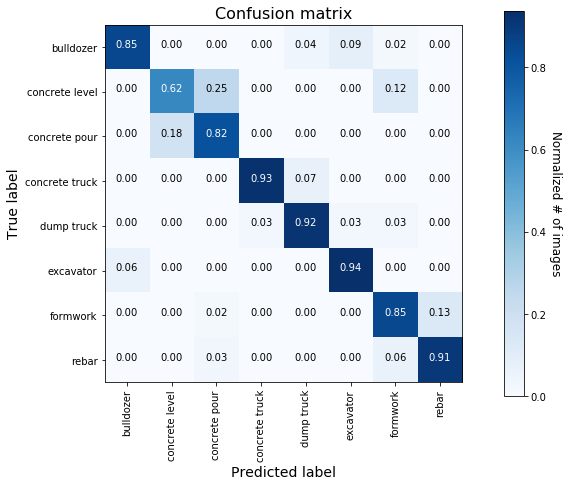

In [5]:
plot_confusion_matrix(y_true, y_pred, 
                      normalize=True, 
                      filename=model_path + 'normalized_conf_mat.png')

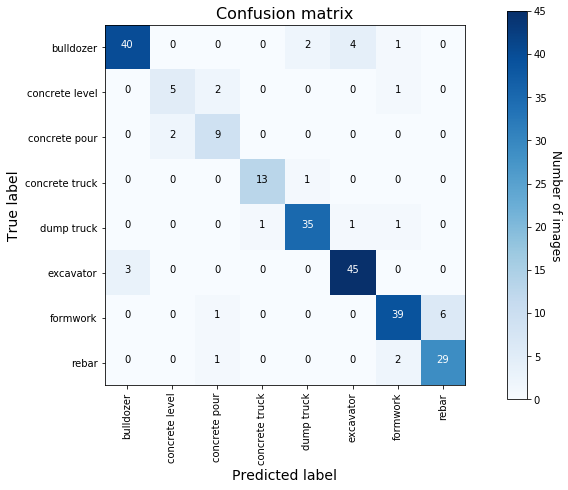

In [6]:
plot_confusion_matrix(y_true, y_pred, 
                      filename=model_path + 'conf_mat.png')